In [1]:
# read the network
filepath = 'grafo.graph'
vertices = [];
edges = [];
readVertices = 0;
readEdges = 0;
with open(filepath) as fp:  
    line = fp.readline()
    cnt = 1
    while line:
        #print("Line {}: {}".format(cnt, line.strip()))
        
        if readVertices == 1:
            vertexData = line.strip().split(';');
            if len(vertexData)==4:
                idxGroup = int(vertexData[3]);
                vertices.append([int(vertexData[0]),idxGroup])
                
        if readEdges == 1:
            edgeData = line.strip().split(';');
            if len(edgeData)==2:
                edges.append([int(edgeData[0]),int(edgeData[1])])
                vertices[int(edgeData[0])].append(int(edgeData[1]));

        
        if line.strip() == '# Vertices':
            print('read vertices')
            readVertices = 1;
        if line.strip() == '# Edges':
            readVertices = 0;
            readEdges = 1;
            print('read edge')
        line = fp.readline()
        cnt += 1
        line.strip() 
#print(vertices)
#array con 1 elemento: numero vertice, 2 elemento: grupo que se encuentra
# resto son los vertices con los que se comunica
#print(edges)

read vertices
read edge


-------------
0.31557692307692303
.
-------------
0.3181730769230769
.
-------------
0.3215705128205128
.
-------------
0.32298076923076924
.
-------------
0.3278846153846154
.
-------------
0.3322115384615385
.
-------------
0.33900641025641026
.
-------------
0.3411858974358974
.
-------------
0.3455769230769231
.
-------------
0.3523076923076923
.
-------------
0.3532692307692308
.
Tamaño poblacion
1000
Homofilia
0.3532692307692308
[[0.48174916 0.34407186 0.71175114]
 [0.48785049 0.34422849 0.71154179]
 [0.49007875 0.34684003 0.71231797]
 [0.48541611 0.34099169 0.71268649]
 [0.49058939 0.34612892 0.71205176]
 [0.48540238 0.34202223 0.71441077]
 [0.48496011 0.3388778  0.71451377]
 [0.48688082 0.33943167 0.71544324]
 [0.48776683 0.33790578 0.71464887]
 [0.4909645  0.33800317 0.71706544]
 [0.48659336 0.3377563  0.71231628]]
cantidad de pares de comunicacion


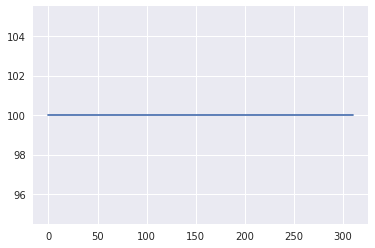

Porcentaje grupos con distinta media de crimen
[0.314 0.359 0.327]
Vector media de crimen por grupos
[0.05, 0, 0.2]
velocidad de olvido
0.9
impacto de la inseguridad nu
0.9
Resistencia a la inseguridad mu
0.1


[Text(0,0,u'0'),
 Text(0,0,u'0.1'),
 Text(0,0,u'0.2'),
 Text(0,0,u'0.3'),
 Text(0,0,u'0.4'),
 Text(0,0,u'0.5'),
 Text(0,0,u'0.6'),
 Text(0,0,u'0.7'),
 Text(0,0,u'0.8'),
 Text(0,0,u'0.9'),
 Text(0,0,u'1')]

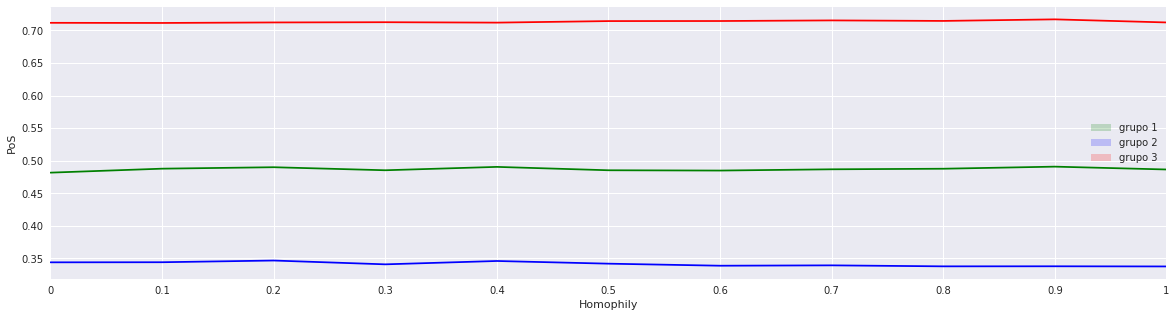

In [14]:
#Simulacion Pos
import numpy as np
import random
import matplotlib.pyplot as plt
n=len(vertices)
#vector identificacion de grupo
g=np.zeros(n)
for i in range(n):
    g[i]=vertices[i][1]
# cantidad de grupos
m=int(max(g)+1)
#porcentaje de cada grupo
q=np.zeros(m)
for i in range(m):
    q[i]=sum((g==i)*1.0)/n
#periodos en semanas
T=312 #6 años
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
psi = 0.9  # velocidad perdida de memoria
nu = 0.9  # Impacto de la inseguridad
mu = 0.1  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
#lamda = np.random.rand(m)  # tasas de crimen de los grupos
#lamda[np.argmax(q)]=0 # para la mayor parte es el grupo inmune
lamda=[0.05,0,0.2]
#identificacion de cada sujeto con su respectiva media de crimen
for i in range(n):
    for j in range(m):
        if g[i]==j:
            g[i]=lamda[j]
            
perceptionHomo=np.zeros((11,3))#percepcion segun la homofilia de los 3 grupos            
homofilia=np.zeros(T)



for h in range(11):
# calculo de la Pos en el intante t
# en t=0 es s
    print("-------------")
    
    St[0] = s
    parescom=np.zeros(T)#cantidad pares de comunicacion en cada periodo
    commismogrupo=np.zeros(T)#cantidad de comunicaciones en el mismo grupo
    for t in range(1,T):
        # Al inicio de cada periodo aplicamos la perdida de memoria
        s = psi * s
        
         #pares de comunicacion 
        #vector de personas aleatoriamente ordenado 
        apersonas=np.random.permutation(np.arange(n))
        #escogemos  10% del extremo izq
        pares1=apersonas[:int(n*0.1)]
        pares2=np.zeros(len(pares1))
        for k in range(len(pares1)):
            varhomo=np.random.binomial(1,h/10.0)    
            if varhomo==1:#si es 1 se comunica en su mismo grupo
            # seleccionamos con quien se da la comunicacion
                j=np.random.choice(vertices[k][2:])
                contador=0
                while j in pares1 or j in pares2 or g[pares1[k]]!=g[j]:
                    j = np.random.choice(vertices[k][2:])
                    contador=contador+1
                    if contador>5:
                        break               
            elif varhomo==0:#si es 0 se comunica con otro grupo
            # seleccionamos con quien se da la comunicacion
                j=np.random.choice(vertices[k][2:])
                contador=0
                while j in pares1 or j in pares2 or g[pares1[k]]==g[j]:
                    j = np.random.choice(vertices[k][2:])
                    contador=contador+1
                    if contador>5:
                        break
            #despues de definir j lo ponemos en el vector pares2
            pares2[k]=j       
        for k in range(len(pares1)):
            aux1=int(pares1[k])
            aux2=int(pares2[k])
            if s[aux1]<s[aux2]:
                s[aux1] = s[aux1] - nu * (s[aux1] - s[aux2])
                s[aux2] = s[aux2] - mu * (s[aux2] - s[aux1])
            else:
                s[aux1] = s[aux1] - mu * (s[aux1] - s[aux2])
                s[aux2] = s[aux2] - nu * (s[aux2] - s[aux1])
            #medicion de la homofilia
            if g[aux1]==g[aux2]:
                commismogrupo[t]=commismogrupo[t]+1
    
    
        parescom[t]=len(pares1)
        homofilia[t]=commismogrupo[t]/parescom[t]
        #crimen                   
        for k in range(n):
            # numero de crimenes sufridos por la persona k 
            X = np.random.poisson(g[k])
            # posicion hubo crimen o no
            I = 0
            if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
                I = 1
            # efecto del crimen en la percepcion de k para el siguiente periodo
            s[k] = I + (1 - I) * s[k]    
        St[t] = s
    print(np.mean(homofilia))
    
    for l in range(3):
        vecaux=[]
        for i in range(n):
            if g[i]==lamda[l]:
                vecaux.append(np.mean(St[104:,i]))
        perceptionHomo[h][l]=np.mean(vecaux)
    
    print(".")
    
print("Tamaño poblacion")
print(n)
print("Homofilia")
print(np.mean(homofilia))
    
print(perceptionHomo)
print("cantidad de pares de comunicacion")
plt.plot(parescom[1:])
plt.show()
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("Vector media de crimen por grupos")
print(lamda)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)

import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(20,5))
sns.tsplot(perceptionHomo[:,0].T,color="green")
sns.tsplot(perceptionHomo[:,1].T,color="blue")
sns.tsplot(perceptionHomo[:,2].T,color="red")
plt.legend(["grupo 1","grupo 2", "grupo 3"])
plt.xlabel("Homophily")
plt.ylabel("PoS")
ax = plt.axes()
ax.xaxis.set_ticks([0, 1, 2, 3, 4,5,6,7,8,9,10])
ax.xaxis.set_ticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'])



                

In [3]:
for i in range(n):
    g[i]=int(vertices[i][1])

contador1=0 
contador2=0
for i in range(n):
    for j in range(len(vertices[i])-2):
        contador2+=1.0
        if g[i]==g[vertices[i][j+2]]:
            contador1+=1.0
print(contador1/contador2)    
E=np.zeros((3,3))

for i in range(n):
    grupo=g[i]
    for j in range(len(vertices[i])-2):
        E[int(g[i])][int(g[j])]=E[int(g[i])][int(g[j])]+1
        
#E=np.array([[506.0,32.0,69.0,26.0],[23.0,308.0,114.0,38.0],[26.0,46.0,599.0,68.0],[10,14,47,32]])

E=E/(sum(sum(E)))
print((np.trace(E)-sum(sum(E**2)))/(1-sum(sum(E**2))))

0.986159259742
0.250135765647996
